In [1]:
# 출력이 너무 길어지지 않게하기 위해 찍지 않도록 했으나 
# 실제 학습 할 때는 아래 두 줄을 주석처리 하는 것을 권장한다.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)

1.1.0
1.18.5


In [3]:
# pandas 설정: 모든 row와 모든 column을 출력하게 하고, 각 column 별 출력되는 글자수는 50자 이내
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 50)

In [4]:
# 위의 설정으로 간단하게 보는 df_specific
df_specific = pd.read_csv("./data_wrangled/df_specific_wrangle.csv", encoding="utf-8")
df_specific.head(2)

,대학코드,대학명,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info
0,AR000004,Universidad del Salvador,아르헨티나의 대다수 대학교는 한국처럼 캠퍼스가 있는 것이 아니라 도시 내에 몇개의 ...,대학교가 도시 여러곳에 분포하고 있으므로 각기 다르다. 하지만 남녀를 불문하고 부에...,기숙사는 학교에서 제공하지 않고 두가지 옵션이 주어진다. 홈스테이 혹은 게스트 하우...,아르헨티나에서의 대학 수업은 주로 오전 혹은 저녁에 있다. 대부분의 학생들이 일을하...,EL SALVADOR대학교는 국제 교육부가 잘 되있는 학교이다. 아르헨티나 대학교들...,부대시설로는 헬스장이 있다고 알고 있으나 시내와 먼 곳에 있었다. 동아리는 몇가지 ...,딱히 컬쳐쇼크를 받을 만 한 요소는 없었던 것 같다. 하지만 처음에 언어적인 면에서...,"살바도르 대학교 국제처에서 비자문제나 숙소문제(홈스테이경우) 등은 해결해 주고, 특...",NaN
1,AU000019,Australian National University,"ANU has a very big campus, but unlike Yonsei, ...","The city center, called CIVIC, is 20min walk a...","There are many housing options, but I chose to...","In my personal opinions, classes are generally...","Overall, I did not have to ask for help much f...","There were many clubs for you to join at ANU, ...",I did have some culture shock during my first ...,"I was helped a lot, especially during the firs...","Overall, my stay in Australia has been nothing..."


In [5]:
# 위의 설정으로 간단하게 보는 df_specific
df_specific.tail(2)

,대학코드,대학명,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info
468,US000274,Whitworth College,내가 다녀온 교환대학은 Washington State 에 위치한 Whitworth ...,Whitworth College는 Seattle에서 비행기로 40분 정도 떨어져 있...,나는 Whitworth College에서 기숙사에 살았다. ISEP으로 가게 되면 ...,내가 미국에 가기 전에 가장 두려워했던 것은 바로 수업이었다. 어학연수와는 달리 교...,이 학교에서 내가 마음 편하게 지낼 수 있었던 것은 국제교육부 스텝들이 너무 따뜻하...,"기타 학교의 부대 시설로는 fitness center, music hall, soc...",NaN,NaN,처음에 Whitworth College를 ISEP으로부터 배정 받았을 때 현실적으로...
469,US000278,Wittenberg University,Wittenberg는 Ohio주의 작은 도시 Springfield에 위치해 있다. ...,"Springfield의 downtown에는 우체국, 은행(huntington) 정도...","1,2학년과 국제학생들 (1년 이하로 있는 학생들)은 모두 기숙사에서 생활하게 된다...",도서관은 Thomas library가 main이고 다른 단과대학 건물에 독서실이 있...,"국제교류부는 Hollenbeck 건물 1층에 있는데, Joann 과 Betsy 두 ...",Wittenberg의 가장 큰 장점. nWittenberg는 학비가 무척 비싼 학교...,"한국에서는 흔치 않은 gay, lesbian, transgender 등을 만날 수 ...",Wittenberg는 국제학생들에게 host family를 붙여준다. 비록 같이 살...,이처럼 wittenberg는 시골에 있는 작은 학교지만 지리적인 위치로 인한 단점보...


In [6]:
print(df_specific.columns)
print(df_specific.shape)

Index(['대학코드', '대학명', 'gen_info', 'env_info', 'food_info', 'study_info',
       'office_info', 'facil_info', 'mhct_info', 'help_info', 'etc_info'],
      dtype='object')
(470, 11)


In [7]:
# pandas 설정: 각 column 별 (혹은 한 cell에서) 출력되는 글자수 제한을 없애기
pd.set_option('display.max_colwidth', None)

In [8]:
import re
# removing junks from the string data
def remove_junk(str_data):
    str_data = str_data.replace("\\\\n", "")
    str_data = str_data.replace("\\n", "")
    str_data = str_data.replace("\n", "")
    str_data = str_data.replace("\\", "")
    str_data = str_data.replace("\\t", "")
    str_data = str_data.replace("NaN", "")

    # print(str_data) makes an error. too much of data
    # 한글, english 빼고 전부 날리기
    # str_data = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z|0-9|.,]', ' ', str_data)

    # 한글 빼고 다 날리기
    str_data = re.sub('[^가-힣ㄱ-ㅎㅏ]', ' ', str_data)

    # replace multiple spaces into single space
    str_data = ' '.join(str_data.split())
    return str_data

In [9]:
# accessing university info of given column (= accessing one cell)
def access_univ_info(dataframe, column, univ_code):
    df_row = dataframe.loc[dataframe["대학코드"] == univ_code]
    str_univ_info = df_row[column].to_string(index=False).lstrip()
    str_univ_info = remove_junk(str_univ_info)
    return str_univ_info

In [10]:
column_data = "gen_info"
univ_code = "DK000003"
str_example = access_univ_info(df_specific, column_data, univ_code)
str_example[:100]

'코펜하겐 대학교는 자연과학캠퍼스 인문캠퍼스 등 코펜하겐 시내 곳곳에 흩어져 있습니다 저는 조경건축 수업을 듣기 위해 에 위치한 자연과학 캠퍼스도 다니고 덴마크어 수업과 미디어커뮤니'

In [11]:
# collecting all column values into one string
def column_to_string(dataframe, column_name: str):
    str_corpus = dataframe[column_name].to_string(index=False).lstrip()
    str_corpus = remove_junk(str_corpus)
    return str_corpus

In [12]:
# collecting all column values into one string
corpus = column_to_string(df_specific, column_data)
print("글자수:", len(corpus))
corpus[:100]

글자수: 3985044


'아르헨티나의 대다수 대학교는 한국처럼 캠퍼스가 있는 것이 아니라 도시 내에 몇개의 건물이 대학교 건물이라서 수업에 맞는 건물로 수업을 들으러 가면 된다 도시의 대중교통이 꽤 잘 되'

In [13]:
info_list = ['gen_info', 'env_info', 'food_info', 'study_info', 'office_info', 'facil_info', 'mhct_info', 'help_info', 'etc_info']

In [14]:
# count how many letters are tehre for each combined columns
"""
for info in info_list:
    corpus_sample = column_to_string(df_specific, info)
    print(info, len(corpus_sample))
"""

"""
gen_info 3985044
env_info 3316342
food_info 4212609
study_info 3970047
office_info 2022400
facil_info 2832921
mhct_info 2307935
help_info 1582255
etc_info 2521724
"""
print("")

## Tokenizing Sample Corpus

In [15]:
# https://github.com/lovit/soynlp
from soynlp.tokenizer import RegexTokenizer, LTokenizer

tokenizer = LTokenizer()
tokenizer

In [16]:
column_data = "gen_info"
# collecting all column values into one string
corpus = column_to_string(df_specific, column_data)
print("글자수:", len(corpus))
print(corpus[:100])

글자수: 3985044
아르헨티나의 대다수 대학교는 한국처럼 캠퍼스가 있는 것이 아니라 도시 내에 몇개의 건물이 대학교 건물이라서 수업에 맞는 건물로 수업을 들으러 가면 된다 도시의 대중교통이 꽤 잘 되


In [17]:
# corpus is info column converted into one string
tokenized_corpus = tokenizer.tokenize(corpus)
print(f"number of tokenized words in a corpus are: {len(tokenized_corpus)}")
print(tokenized_corpus[:10])

number of tokenized words in a corpus are: 1002499
['아르헨티나의', '대다수', '대학교는', '한국처럼', '캠퍼스가', '있는', '것이', '아니라', '도시', '내에']


In [18]:
from collections import Counter

In [19]:
tokenized_corpus_counted = Counter(tokenized_corpus)
print("number of counted words:", len(tokenized_corpus_counted))
common_words = tokenized_corpus_counted.most_common(300)
print(common_words)

number of counted words: 100474
[('있습니다', 9640), ('수', 9293), ('있는', 7638), ('때문에', 6284), ('는', 6068), ('많이', 5807), ('매우', 4400), ('학교', 4182), ('큰', 4145), ('분', 4012), ('정도', 3883), ('것', 3829), ('월', 3700), ('있다', 3680), ('시간', 3639), ('하지만', 3495), ('캠퍼스', 3344), ('비가', 3087), ('날씨가', 3008), ('위치하고', 2981), ('위치한', 2868), ('에', 2837), ('정말', 2815), ('그', 2780), ('있고', 2742), ('이', 2742), ('위치해', 2729), ('제가', 2716), ('작은', 2709), ('저는', 2618), ('한', 2604), ('가장', 2509), ('크기는', 2506), ('의', 2499), ('잘', 2457), ('더', 2439), ('거의', 2379), ('다른', 2299), ('기후는', 2293), ('정도로', 2273), ('같습니다', 2258), ('날씨는', 2125), ('있어서', 2108), ('미국', 2106), ('캠퍼스는', 2101), ('할', 2046), ('약', 2004), ('합니다', 1975), ('좋은', 1857), ('그리고', 1856), ('타고', 1840), ('조금', 1794), ('굉장히', 1794), ('있으며', 1784), ('에서', 1775), ('캠퍼스가', 1769), ('있어', 1732), ('때', 1720), ('눈이', 1658), ('것이', 1642), ('많은', 1640), ('갈', 1606), ('도시', 1593), ('가', 1577), ('자주', 1553), ('거리에', 1531), ('수업을', 1512), ('않습니다', 1500), ('라는

In [20]:
common_words_list, frequency_list = map(list, zip(*common_words))
print(common_words_list[:10])

['있습니다', '수', '있는', '때문에', '는', '많이', '매우', '학교', '큰', '분']


In [21]:
# removing possible significant words from common words
def filter_stopwords():
    stopwords_candidates = []

    for info in info_list:
        # info column series
        df_info = df_specific[info].fillna("")
        print(df_info.shape)
        
        # info column converted into one string
        corpus = column_to_string(df_specific, info)
        tokenized_corpus = tokenizer.tokenize(corpus)
        print(tokenized_corpus[:10])
        print(f"number of tokenized words in a corpus are: {len(tokenized_corpus)}")

        tokenized_corpus_counted = Counter(tokenized_corpus)
        print("number of counted words:", len(tokenized_corpus_counted))

        common_words = tokenized_corpus_counted.most_common(300)
        common_words_list, frequency_list = map(list, zip(*common_words))
        print(common_words_list[:10])    

        stopwords_candidates += common_words_list
        print(len(stopwords_candidates))

        for i in stopwords_candidates:
            if df_info.str.contains(i).sum() < 120:
                print(f"{i} word not appear in less than 1/4 of universities")
                stopwords_candidates.remove(i)
        
        print(len(stopwords_candidates))
        print(f"{random.sample(stopwords_candidates,10)} are random stopwords candidates")
        
        stopwords = stopwords_candidates
        
        with open("file.txt", "wt", encoding="UTF8") as output:
            output.write(stopwords)

In [22]:
# read stopwords genarated from filter_stopwords() function
stopwords_file = open('stopwords_kr.txt','rt', encoding='UTF8')
stopwords_txt = stopwords_file.read()
stopwords_list = stopwords_txt.strip('').split(', ')

# get human selected stopwords
stopwords_nogada_file = open('stopwords_nogada.txt','rt', encoding='UTF8')
stopwords_nogada_txt = stopwords_nogada_file.read()
stopwords_nogada = stopwords_nogada_txt.strip('').split(', ')

stopwords_list = stopwords_list + stopwords_nogada

print(f"total {len(stopwords_list)} number of stopwords available")
print(stopwords_list[:3], stopwords_list[-4:])

total 1843 number of stopwords available
['있습니다', '수', '있는'] ['않다', '되다', '되어다', '건물']


## Tokenizing one column of university dataframe with soynlp

In [23]:
column_data = "env_info"
# df_column = df_specific[df_specific[column_data].notnull()]
df_column = df_specific[column_data].fillna("")

In [24]:
df_column.head(1)[:100]

0    대학교가 도시 여러곳에 분포하고 있으므로 각기 다르다. 하지만 남녀를 불문하고 부에노스 아이레스에서 밤에 혼자 다니는 것은 위험하다. 낮에는 대체적으로 사람들이 많이 다니므로 위험하지 않지만 외진곳은 피하는 것이 좋다. n학교 건물 주변에 편의점이나 공원등이 곳곳이 있으므로 공강시 이용이 편리하다.
Name: env_info, dtype: object

In [25]:
df_column.tail(1)[:100]

469    Springfield의 downtown에는 우체국, 은행(huntington) 정도 밖에 이용할 것이 없어서 쇼핑을 하려면 Columbus에 있는 대형 mall이나 fairfield에 있는 mall을 이용해야 한다. 학교에서 20분 정도 차를 타고 가면 fairborn이라는 작은 도시에 몇몇 한국 마트와 식당이 있어서 가끔 한국 음식이 그리울 때면 찾곤 했었다. springfield에 거주하는 한국인은 단 한명도 없다고 한다. 교환학생으로 파견되었던 나를 포함한 학생 세명이 전부이고, 심지어 옆 도시인 fairborn의 한국 식당에도 한국 사람은 없고, 거의 미국인이다. 화려한 대도시가 아니라서 싫어할 사람들도 있겠지만, 영어만 쓰기에 좋은 환경이고, 아시아인들이 거의 없어서 학교 밖에서도 사람들이 다들 먼저 관심을 보여주기 때문에 1년동안 즐겁게 생활할 수 있었다. n대중교통은 한번도 이용해 본적이 없는데, 버스는 75센트인데 자주 다니지 않아서 주로 차가 있어야 캠퍼스... 학교 주변은 한산한 Springfield 의 한 구석이다. 음악회, 연극 등의 문화행사들은 마을에서보다 학교 안에서 열리는 경우가 더욱 많으며 따라서 주민들이 주말이면 학교로 그런 행사들을 찾아 들어온다. Springfield 시내에 있는 큰 음악회관에서 열리는 정기적인 음악회나 공연 역시 주로 Wittenberg 의 후원 혹은 주최로 열리는 경우가 대부분이다. 마을에 교회들은 교파별로 상당히 다양하게 숫적으로도 많아서 음악을 전공하는 내 룸메이트는 자신이 관심있는 음악을 연주하는 교회들을 찾아서 골라다닐 수도 있을 정도였다. 이곳에 한국인이 거의 살지 않기 때문에, 알아보지는 않았지만 한인교회는 없는 듯 하다. 마을이 큰 화재 이후 상당히 침체되어 젊은 학생들에게는 지루한 곳으로 이야기된다. 그래서 휴일이나 방학 직전만 되면 Wittenberg 의 학생들은 집으로 떠나거나(많은 수의 학생들이 다른 주state 에서 온다. ) 어디로 놀러 갈 것인지가 학생식당에서의 주 관심

In [26]:
df_process = df_column.apply(remove_junk)

In [27]:
%time df_tokens = df_process.apply(tokenizer.tokenize)

CPU times: user 1.72 s, sys: 22.9 ms, total: 1.75 s
Wall time: 1.75 s


In [28]:
df_tokens.shape

(470,)

In [29]:
df_tokens[0:2]

0                                                                                                                                                                                                                                                                                                             [대학교가, 도시, 여러곳에, 분포하고, 있으므로, 각기, 다르다, 하지만, 남녀를, 불문하고, 부에노스, 아이레스에서, 밤에, 혼자, 다니는, 것은, 위험하다, 낮에는, 대체적으로, 사람들이, 많이, 다니므로, 위험하지, 않지만, 외진곳은, 피하는, 것이, 좋다, 학교, 건물, 주변에, 편의점이나, 공원등이, 곳곳이, 있으므로, 공강시, 이용이, 편리하다]
1    [캠퍼스, 자체는, 자연입니다, 정문에서, 걸어서, 분, 정도면, 라고, 생긴지, 얼마, 안된, 큰, 쇼핑센터가, 있구요, 마트, 영화관, 클럽, 등, 전부, 가까워요, 물론, 캔버라, 자체가, 작은, 도시입니다만, 그래서, 기숙사에만, 거주하신다면, 대중교통을, 거의, 이용할, 필요, 없다는, 장점이, 있습니다, 행정, 수도기, 때문에, 웬만한, 것은, 다, 갖추어져있기도, 하구요, 또, 이라는, 커다란, 인공, 호수와, 아주, 가까운데요, 정말, 아름다운, 호수입니다, 조깅, 자전거, 라이딩, 도로를, 따라, 내려가면, 작은, 들판이, 나오는데요, 거기서, 보았던, 노을은, 평생, 잊을, 수, 없을, 듯, 합니다, 대학교, 주변에, 센터가, 있고, 그, 곳에, 술집과, 영화관, 카페, 등이, 있지만, 거기를, 빼고는, 사실, 놀거리가, 많지는, 않습니다, 연세대, 주변, 환경과는, 거의, 반대라는, 점, 감안하시고, 가시길, 바랍니다, 자연을, 좋아하시고, 고요함

In [30]:
df_tokens[-2:]

468          [는, 에서, 비행기로, 분, 정도, 떨어져, 있다, 다시, 말하자면, 에서, 동쪽으로, 그, 정도의, 거리가, 떨어져, 있다는, 것이다, 의, 날씨가, 바다, 때문에, 습하다면, 가, 있는, 이라는, 도시는, 비교적, 건조하다고, 할, 수, 있다, 계절은, 우리, 나라와, 비슷하지만, 여름에도, 별로, 습하지, 않다, 개인적으로, 습한, 날씨를, 싫어했던, 나에게는, 최상의, 날씨였다고, 할, 수, 있다, 겨울엔, 춥지만, 우리, 나라처럼, 강한, 바람을, 동반한, 혹한은, 찾아오지, 않는다, 재미있는, 것은, 그, 곳에서, 첫눈은, 월말에, 왔는데, 날씨는, 별로, 춥지, 않다는, 것이다, 기온의, 변동이, 많지, 않고, 습기가, 별로, 없다는, 점에서, 날씨는, 살아가기에, 매우, 편하다고, 할, 수, 있다, 월에는, 비도, 자주, 왔는데, 그, 곳에는, 우산을, 쓴, 사람을, 찾아보기, 힘들다, 다들, 방수가, 되는, ...]
469    [의, 에는, 우체국, 은행, 정도, 밖에, 이용할, 것이, 없어서, 쇼핑을, 하려면, 에, 있는, 대형, 이나, 에, 있는, 을, 이용해야, 한다, 학교에서, 분, 정도, 차를, 타고, 가면, 이라는, 작은, 도시에, 몇몇, 한국, 마트와, 식당이, 있어서, 가끔, 한국, 음식이, 그리울, 때면, 찾곤, 했었다, 에, 거주하는, 한국인은, 단, 한명도, 없다고, 한다, 교환학생으로, 파견되었던, 나를, 포함한, 학생, 세명이, 전부이고, 심지어, 옆, 도시인, 의, 한국, 식당에도, 한국, 사람은, 없고, 거의, 미국인이다, 화려한, 대도시가, 아니라서, 싫어할, 사람들도, 있겠지만, 영어만, 쓰기에, 좋은, 환경이고, 아시아인들이, 거의, 없어서, 학교, 밖에서도, 사람들이, 다들, 먼저, 관심을, 보여주기, 때문에, 년동안, 즐겁게, 생활할, 수, 있었다, 대중교통은, 한번도, 이용해, 본적이, 없는데, 버스는, 센트인데, 자주, ...]
Name: env_info, dtype: objec

## Extract Keyword
### list of common words in university review(one cell) - list of common words that can be found across rows

In [31]:
# make bag of words out of one university's students' reviews
import random
random_int = random.randint(0,469)
sample_univ_bow = df_tokens[random_int]
print(len(sample_univ_bow))
while len(sample_univ_bow) < 500:
    random_int = random.randint(0,469)
    sample_univ_bow = df_tokens[random_int]
    print(len(sample_univ_bow))
print(df_specific["대학명"][random_int])
sample_univ_bow[:10]

2050
Public University of Navarre


['앞서',
 '말씀드렸듯이',
 '캠퍼스',
 '내에는',
 '카페테리아랑',
 '도서관',
 '학교',
 '스포츠센터가',
 '존재하며',
 '스포츠센터']

In [32]:
subtracted_bow_list = [item for item in sample_univ_bow if item not in stopwords_list]

In [33]:
counted_bow_keywords = Counter(subtracted_bow_list)
sample_keywords = counted_bow_keywords.most_common(100)
print(sample_keywords)

[('걸어서', 15), ('거리에', 11), ('버스를', 8), ('주변은', 8), ('식당', 7), ('위치하고', 7), ('팜플로나', 7), ('캠퍼스에서', 6), ('쇼핑몰이', 6), ('등이', 6), ('마트나', 5), ('주변에는', 5), ('크지', 5), ('캠퍼스', 4), ('싼', 4), ('주변에', 4), ('떨어진', 4), ('쪽으로', 4), ('있어요', 4), ('라', 4), ('대학교', 4), ('조용하고', 4), ('걸립니다', 4), ('대학은', 4), ('스페인의', 4), ('자체가', 4), ('좋았습니다', 3), ('지역이', 3), ('보통', 3), ('매주', 3), ('거리가', 3), ('분정도', 3), ('나바라', 3), ('아무것도', 3), ('어학당', 3), ('대형', 3), ('바', 3), ('가까운', 3), ('축구', 3), ('경기를', 3), ('마트가', 3), ('시설이', 3), ('중심으로', 3), ('구시가지', 3), ('옆에', 3), ('도보로', 3), ('버스', 3), ('스페인에서', 3), ('유로', 3), ('없고', 3), ('않아서', 3), ('시내', 3), ('라고하는', 3), ('다닐', 3), ('서점', 3), ('구장이', 3), ('쇼핑센터가', 3), ('스페인', 3), ('도시이기', 3), ('빰쁠로나는', 3), ('구', 3), ('스포츠센터', 2), ('시설은', 2), ('시설', 2), ('가격에', 2), ('카페테리아는', 2), ('않았지만', 2), ('근처', 2), ('식당들은', 2), ('장볼', 2), ('한국과', 2), ('위치해', 2), ('곳들이', 2), ('나가면', 2), ('팜플로나의', 2), ('인근에', 2), ('목요일', 2), ('대신', 2), ('엘', 2), ('길에', 2), ('남쪽으로', 2), ('식당과', 2), ('매장', 2),

In [34]:
# zipping deletes overlapping string items
zipped_keywords, frequency_list = map(list, zip(*sample_keywords))
print(zipped_keywords)

['걸어서', '거리에', '버스를', '주변은', '식당', '위치하고', '팜플로나', '캠퍼스에서', '쇼핑몰이', '등이', '마트나', '주변에는', '크지', '캠퍼스', '싼', '주변에', '떨어진', '쪽으로', '있어요', '라', '대학교', '조용하고', '걸립니다', '대학은', '스페인의', '자체가', '좋았습니다', '지역이', '보통', '매주', '거리가', '분정도', '나바라', '아무것도', '어학당', '대형', '바', '가까운', '축구', '경기를', '마트가', '시설이', '중심으로', '구시가지', '옆에', '도보로', '버스', '스페인에서', '유로', '없고', '않아서', '시내', '라고하는', '다닐', '서점', '구장이', '쇼핑센터가', '스페인', '도시이기', '빰쁠로나는', '구', '스포츠센터', '시설은', '시설', '가격에', '카페테리아는', '않았지만', '근처', '식당들은', '장볼', '한국과', '위치해', '곳들이', '나가면', '팜플로나의', '인근에', '목요일', '대신', '엘', '길에', '남쪽으로', '식당과', '매장', '우체국', '카페', '맥주와', '핀초', '축제가', '열리는', '붐비는', '가게', '조용한', '주거', '경기장이', '도보', '버스로', '모레아', '생각하시면', '쇼핑몰', '카스티요']


### Keywords according to Sentences order

In [35]:
counted_bow = Counter(sample_univ_bow)
counted_bow_tuple_list = list(Counter(counted_bow).items())
print(counted_bow_tuple_list[:50])

[('앞서', 1), ('말씀드렸듯이', 1), ('캠퍼스', 4), ('내에는', 1), ('카페테리아랑', 1), ('도서관', 1), ('학교', 17), ('스포츠센터가', 1), ('존재하며', 1), ('스포츠센터', 2), ('시설은', 2), ('잘', 5), ('되어있는', 1), ('편입니다', 1), ('저는', 4), ('테니스', 1), ('수업을', 1), ('신청하였는데', 1), ('학생들에게는', 1), ('스포츠', 1), ('수업이나', 1), ('시설', 2), ('이용료가', 1), ('매우', 5), ('싼', 4), ('가격에', 2), ('제공되니', 1), ('이용해보시길', 1), ('추천드립니다', 1), ('카페테리아는', 2), ('제', 3), ('개인적으로는', 1), ('만족스럽진', 1), ('않았지만', 2), ('가격이', 1), ('싸고', 1), ('급하게', 1), ('끼니를', 1), ('떼워야할', 1), ('때', 2), ('이용하기', 1), ('좋았습니다', 3), ('근처', 2), ('식당', 7), ('카페로는', 1), ('가', 1), ('가장', 7), ('괜찮았고', 1), ('그', 8), ('외', 1)]


In [36]:
# zipping deletes overlapping string items
zipped_bow_words, bow_frequency_list = map(list, zip(*counted_bow_tuple_list))
zipped_bow_words[:10]

['앞서',
 '말씀드렸듯이',
 '캠퍼스',
 '내에는',
 '카페테리아랑',
 '도서관',
 '학교',
 '스포츠센터가',
 '존재하며',
 '스포츠센터']

In [37]:
zipped_bow_words_subtracted = [item for item in zipped_bow_words if item not in stopwords_list]

In [38]:
print(random.sample(zipped_bow_words_subtracted, 50))
print(len(zipped_bow_words_subtracted))

['조용합니다', '구매는', '분정도라', '데서', '금요일', '주변의', '출국했는데', '중심이', '디스코에', '챙겨서', '이곳에서', '밀집된', '차지합니다', '별다른', '공부하거나', '거기가면', '곳도', '가량', '목금토일은', '아트갤러리', '거주공간이나', '곳이라서', '홈파티가', '쳐다봤었어요', '까르푸라고', '팜플로나에는', '시내까지는', '웬만한', '중심은', '같아도', '없어서', '길에', '디저트까지', '클럽이', '안되는', '작지만', '가까운', '워낙', '분들께는', '팜플로나가', '배우는', '생각하신다면', '집중되어있다', '보낼', '들기도', '장볼', '안에서', '일도', '수업이나', '문학']
1049


In [39]:
summary = " ".join(zipped_bow_words_subtracted)
summary = summary.replace("니다", "니다.")
summary[:500]

'앞서 말씀드렸듯이 캠퍼스 내에는 카페테리아랑 도서관 스포츠센터가 존재하며 스포츠센터 시설은 되어있는 편입니다. 테니스 신청하였는데 학생들에게는 스포츠 수업이나 시설 이용료가 싼 가격에 제공되니 이용해보시길 추천드립니다. 카페테리아는 개인적으로는 만족스럽진 않았지만 가격이 싸고 급하게 끼니를 떼워야할 이용하기 좋았습니다. 근처 식당 카페로는 괜찮았고 외 식당들은 주변에 존재하지 버스를 아울렛몰이 나오는데 팜플로나에서 멀티플렉스 쇼핑센터로 이용했습니다. 팜플로나라는 지역이 워낙 대도시랑은 떨어진 곳이어서 마드리드나 바르셀로나와는 정반대라고 생각할 우선 팜플로나에 장볼 마트나 대형마트에 알려드리겠습니다. 한국과 편의점이 까르푸라고 구글지도에 찾아보시면 어디에 위치해 있던지 찾을 까르푸 뿐만 이외에도 곳들이 한국재료를 파는 마트는 없지만 중국마트를 쌀이나 고추장 재료들은 구입하실 다음으로 쇼핑센터입니다. 것들은 보통 마트에서 쇼핑할 몰이 버스타고 외곽으로 나가면 가까워서 학교끝나고 가기에 '

## use konlpy mecab for tokenizing

In [40]:
# tokenizing sentences into nouns, verbs, etc
from konlpy.tag import Mecab
mecab_tokenizer = Mecab()

In [41]:
# tokenization for mecab: http://openuiz.blogspot.com/2016/07/mecab-ko-dic.html
mecab_pos = ["NNG", "NNP", "VV", "VA", "MAG"]

In [42]:
mecab_keywords = [
            word
            for word, tag in mecab_tokenizer.pos(summary, flatten=True)
            if len(word) > 1 and tag in mecab_pos and word not in stopwords_list
        ]
print(df_specific["대학명"][random_int])
print(f"number of keywords: {len(mecab_keywords)}")
print(mecab_keywords[:50])

Public University of Navarre
number of keywords: 723
['앞서', '캠퍼스', '카페테리아', '도서관', '스포츠센터', '존재', '스포츠센터', '시설', '테니스', '신청', '스포츠', '시설', '이용료', '가격', '제공', '이용', '추천', '카페테리아', '만족', '가격', '급하', '끼니', '이용', '근처', '식당', '카페', '괜찮', '식당', '주변', '존재', '버스', '아울렛', '나오', '팜플로나', '멀티플렉스', '쇼핑', '센터', '이용', '팜플로나', '지역', '워낙', '바르셀로나', '우선', '팜플로나', '마트', '대형', '마트', '편의점', '까르푸', '구글']


### wordcloud generation without frequency consideration

In [43]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 워드클라우드를 위한 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# 워드클라우드를 위한 나눔고딕 경로 설정
import matplotlib.font_manager as fm
fontpath = './font/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [52]:
print(random_int)

206


In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
backgroundcolor = "white"
width=800
height=600
wordcloud = WordCloud(font_path = fontpath,
                        # stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                        max_words= 50,
                        max_font_size= 300,
                        width = width, 
                        height = height)

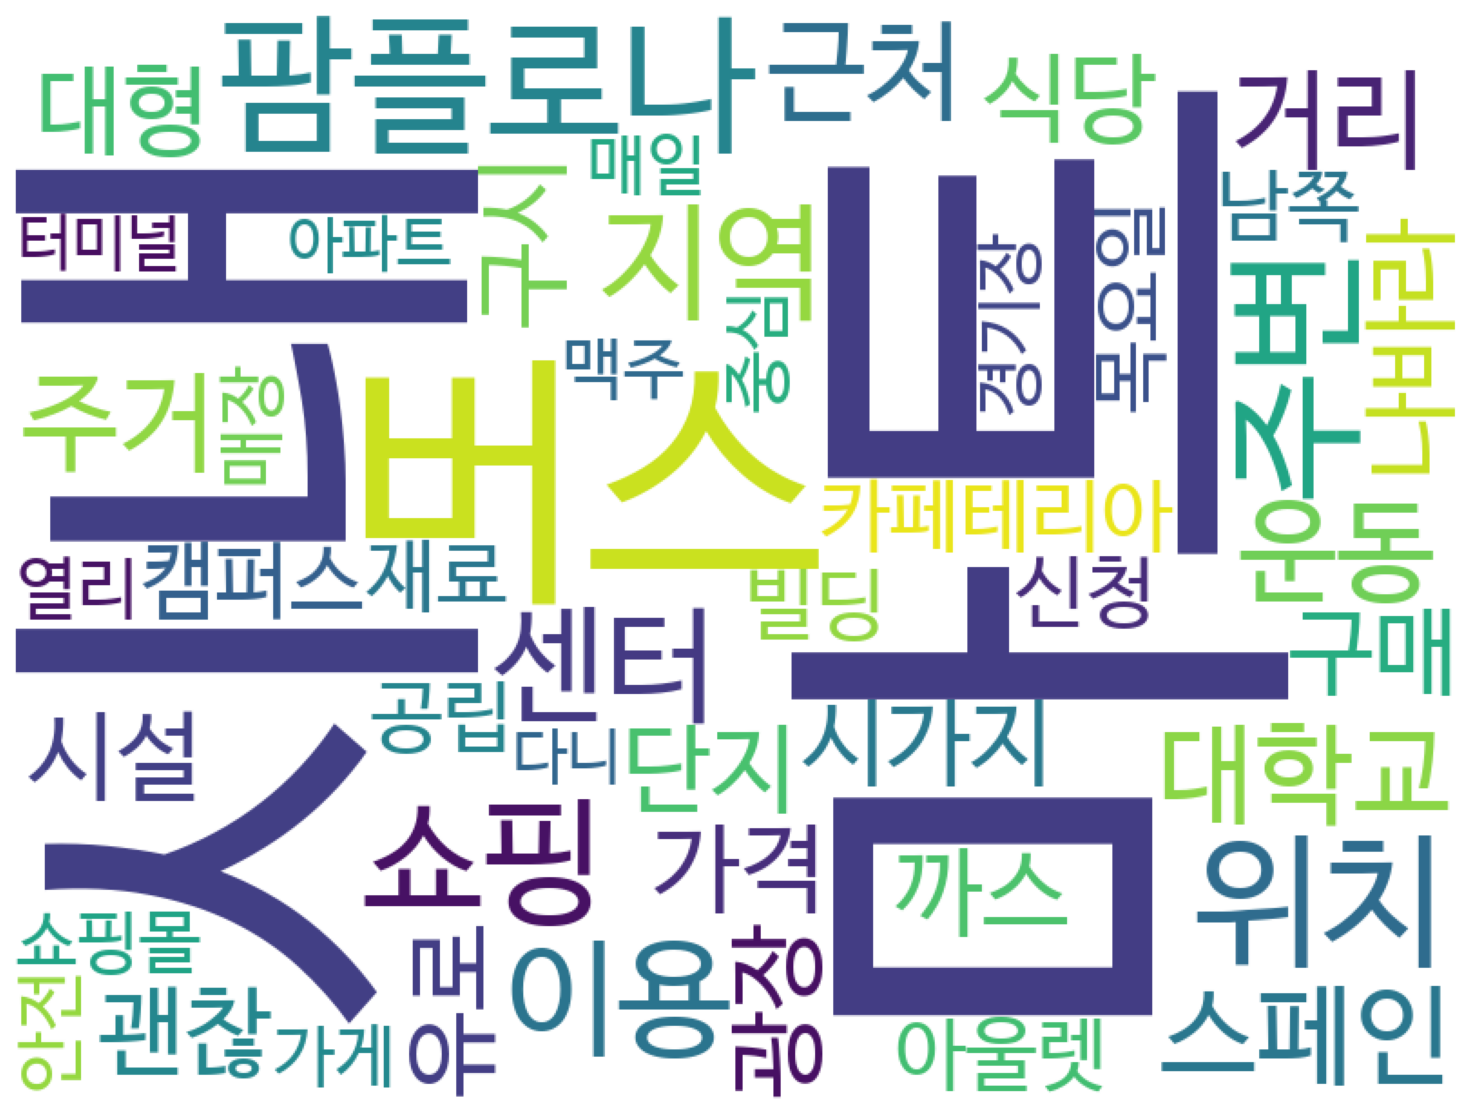

In [46]:
# 빈도수 별로 단어를 크게 표시한다
str_keywords = ' '.join(mecab_keywords)
mecab_wordcloud = wordcloud.generate(str_keywords)
mecab_wordcloud_fig = plt.figure(figsize = (15 , 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

# save wordcloud png as file
college_code = df_specific["대학코드"][random_int]
wordcloud.to_file(f"./img/{college_code}_{column_data}_mecab.png")

## use konlpy okt for tokenizing
### wordcloud generation considering frequency

In [47]:
from konlpy.tag import Okt
okt_tokenizer = Okt()

def okt_kor_tokenizer(raw, stopwords):
    # position arguments(or position tags): 내가 뽑아내고 싶은 형태소들
    twitter_pos = ["Noun", "Alpha", "Verb", "Number", "Adverb"]
    twitter_list = [
        word
        # normalize 그랰ㅋㅋ -> 그래ㅋㅋ  # stemming 바뀌나->바뀌다
        for word, tag in okt_tokenizer.pos(raw, norm=True, stem=True)
        if len(word) > 1 and tag in twitter_pos and word not in stopwords
    ]
    return twitter_list

# combine extracted noun and verb list without overlapping

In [48]:
okt_words = okt_kor_tokenizer(summary, stopwords_list)
okt_words[:10]

['앞서', '말씀드리다', '캠퍼스', '카페테리아', '도서관', '스포츠', '센터', '존재', '스포츠', '센터']

In [49]:
# Okt divided nouns list term frequency
okt_words_counted = Counter(okt_words)
print("number of counted words:", len(okt_words_counted))
okt_words_counted.most_common(50)

number of counted words: 503


[('마트', 14),
 ('시내', 12),
 ('버스', 11),
 ('팜플로나', 10),
 ('시가지', 10),
 ('센터', 9),
 ('주변', 9),
 ('위치', 9),
 ('이용', 8),
 ('쇼핑', 8),
 ('들다', 6),
 ('근처', 5),
 ('지역', 5),
 ('중심', 5),
 ('나바라', 5),
 ('거리', 5),
 ('걸다', 5),
 ('대학교', 5),
 ('가다', 5),
 ('운동', 5),
 ('다니다', 5),
 ('스페인', 5),
 ('시설', 4),
 ('가격', 4),
 ('식당', 4),
 ('대형', 4),
 ('걸리다', 4),
 ('단지', 4),
 ('유로', 4),
 ('열리다', 4),
 ('놀다', 4),
 ('광장', 4),
 ('구매', 4),
 ('거기', 4),
 ('캠퍼스', 3),
 ('카페테리아', 3),
 ('스포츠', 3),
 ('신청', 3),
 ('싸다', 3),
 ('해보다', 3),
 ('나오다', 3),
 ('어디', 3),
 ('재료', 3),
 ('목요일', 3),
 ('모이다', 3),
 ('공립', 3),
 ('타다', 3),
 ('빌딩', 3),
 ('남쪽', 3),
 ('쇼핑몰', 3)]

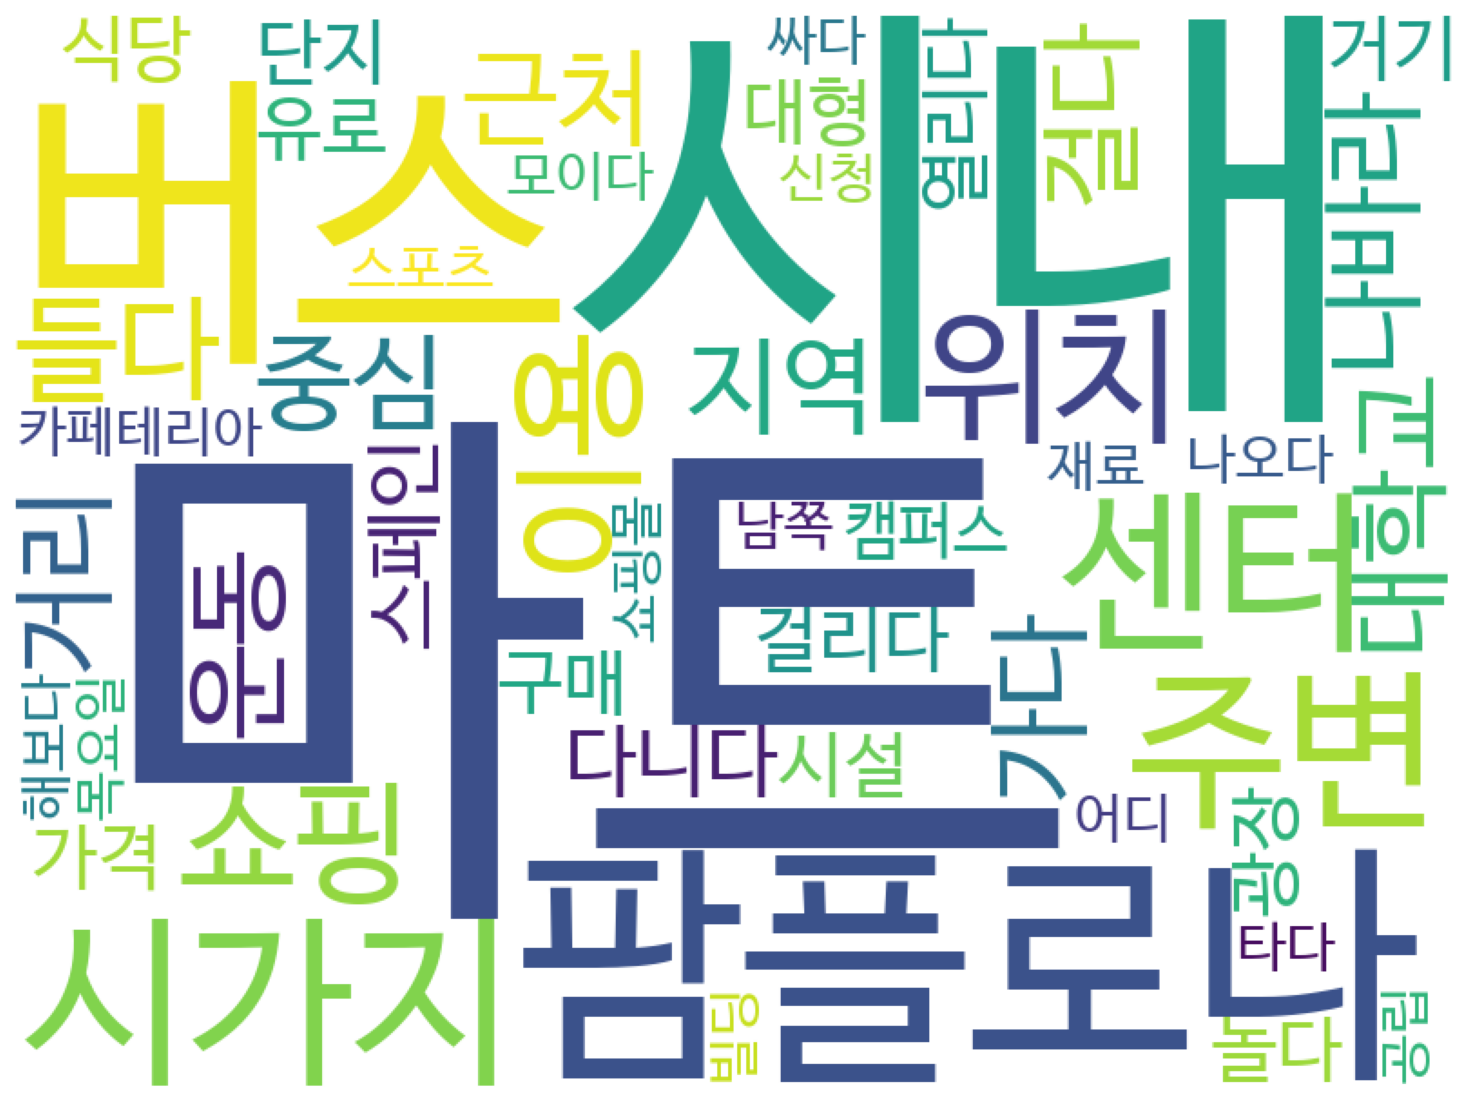

In [50]:
# 빈도수 별로 단어를 크게 표시한다
wordcloud.generate_from_frequencies(frequencies = okt_words_counted) # mecab으로 추출한 명사로 워드클라우드를 그린다.
plt.figure(figsize = (15 , 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 
wordcloud.to_file(f"./img/{college_code}_{column_data}_okt.png")